In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("order_simulations/orders.csv")
data

,id,order_id,trader,event,kind,side,price,qty,instrument,sequence,time
0,82334b4a-14e8-4073-b6b2-85b36a28f628,1a333190-0a0d-46f2-81c4-ee0530364ebe,4,New,Market,Sell,142.44,2984.0,AAPL,0,2022-10-13T21:41:41.136465800Z
1,6e06a081-7add-4611-8406-227d7db2affb,d69afc0f-a6c4-4b49-9726-a5c11d570cd8,0,New,Limit,Sell,178.93,6098.0,AAPL,100,2022-10-13T21:41:41.136510600Z
2,cd0fbbb7-c83a-427f-869d-9049486e2949,95a462ae-d37d-4277-b000-fc4fd9c59d77,1,New,Limit,Sell,152.33,1352.0,AAPL,1,2022-10-13T21:41:41.136531500Z
3,abdc229c-e645-44a1-bad8-115a61f11234,3ee4b953-0f17-4063-91c9-ba64052ca9ed,0,New,Limit,Buy,92.23,8417.0,AAPL,2,2022-10-13T21:41:41.136539900Z
4,d711e2ae-f4b9-4274-905f-762dbcdd33e1,ca5314b2-295f-45b0-af63-57758f524ff3,5,New,Market,Sell,142.44,254.0,AAPL,3,2022-10-13T21:41:41.136546600Z
...,...,...,...,...,...,...,...,...,...,...,...
995,07a24c65-dfa0-4a7d-a07d-2e7bbba5470b,3986f5ef-e498-45d3-a2fe-d627e4ab286d,6,New,Limit,Sell,212.09,8396.0,AAPL,995,2022-10-13T21:41:41.141935400Z
996,56702cec-d0ea-4072-a3ef-689f1af1e48d,97e8a4c5-5868-4cf6-a637-5121efa8b1d7,4,Update,Limit,Buy,142.44,6874.0,AAPL,996,2022-10-13T21:41:41.141961700Z
997,4383ca7f-fa61-4774-9dc8-f2590e30c11d,a116c9d9-f4c5-4908-a286-c4a8d2f5cf32,5,New,Limit,Sell,158.24,6320.0,AAPL,997,2022-10-13T21:41:41.141970600Z
998,7cb70260-2294-48e6-b31c-34f0dec3313c,794e2705-402c-4513-8e7a-2d710373080f,8,Cancel,Limit,Buy,83.37,9542.0,AAPL,998,2022-10-13T21:41:41.141978900Z


# Transactions per second (TPS)

1933461 TPS


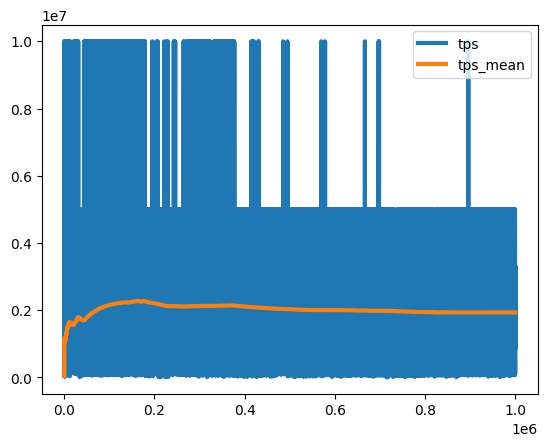

In [100]:
df = data.copy()
df['tps'] = 1e9 / df.execution_time
df['tps_mean'] = df.tps.expanding().mean()
df[["tps","tps_mean"]].plot(legend=True, linewidth=3)
print(f"{int(df['tps_mean'].iloc[-1])} TPS")

# Distribution of quantities per order

<AxesSubplot: >

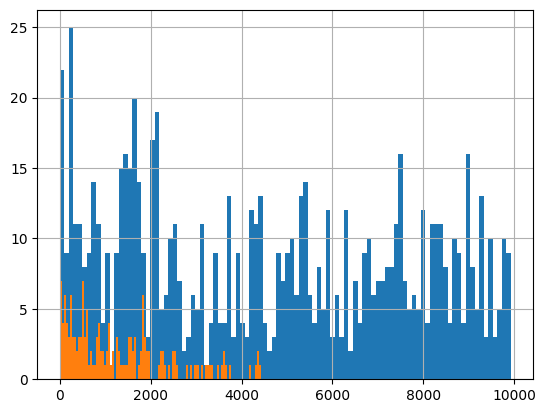

In [4]:
df = data.copy()
df[df["kind"]=="Limit"].qty.hist(bins=100)
df[df["kind"]=="Market"].qty.hist(bins=100)

# Distribution of prices per order

<AxesSubplot: >

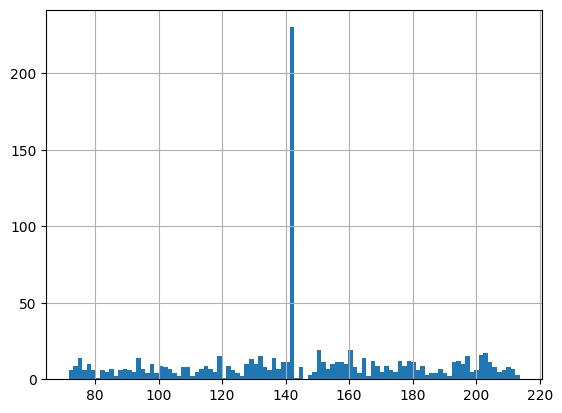

In [5]:
df = data.copy()
df.price.hist(bins=100)

<AxesSubplot: xlabel='side'>

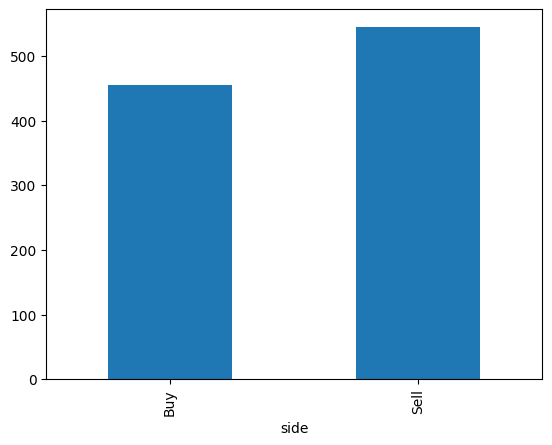

In [6]:
df = data.copy()
df.groupby(["side"]).id.count().plot(kind="bar")

In [7]:
df = data.copy()
df.groupby(["event"]).execution_time.mean().plot(kind="bar")

AttributeError: 'DataFrameGroupBy' object has no attribute 'execution_time'

In [8]:
df = data.copy()
df.groupby(["status"]).execution_time.mean().plot(kind="bar")

KeyError: 'status'

In [9]:
df = data.copy()
df.groupby(["status"]).id.count().plot(kind="bar")
df.groupby(["status"]).id.count()

KeyError: 'status'

kind
Limit     707686
Market    292314
Name: id, dtype: int64

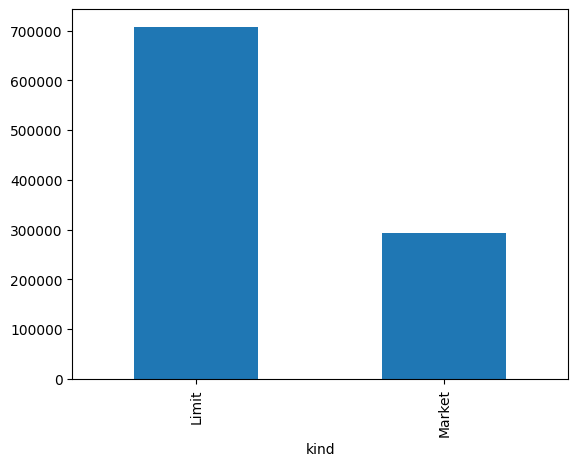

In [107]:
df = data.copy()
df.groupby(["kind"]).id.count().plot(kind="bar")
df.groupby(["kind"]).id.count()

# Execution times per order

<AxesSubplot: >

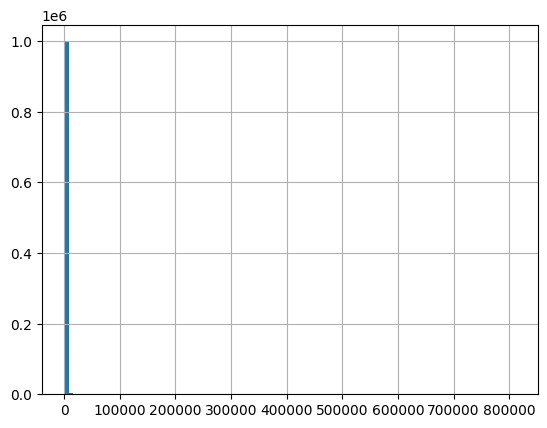

In [108]:
df['execution_time'].hist(bins=100)

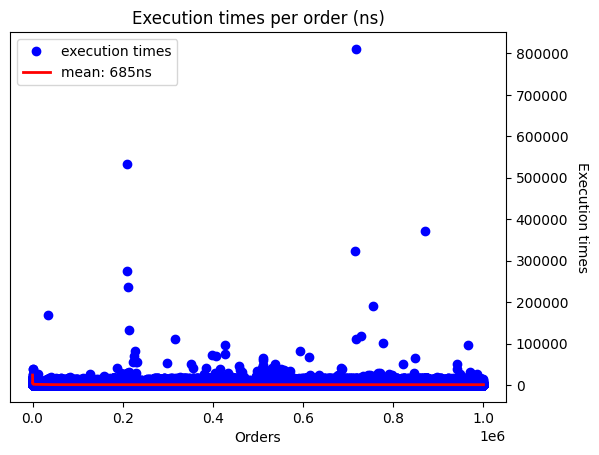

In [109]:
df = data.copy()
fig, ax = plt.subplots()
plt.xlabel(f'Orders')
plt.ylabel(f'Execution times', rotation=270, labelpad=15)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.title(f'Execution times per order (ns)')

mean = df['execution_time'].expanding().mean()
ax.plot(df["execution_time"], 'o', c='b', label="execution times")
ax.plot(mean, 'r', linewidth=2, label=f"mean: {int(mean.iloc[-1])}ns")
ax.legend()
fig.patch.set_facecolor('xkcd:white')
# fig.set_size_inches(20, 10)

# Filtering outliers (<2std)

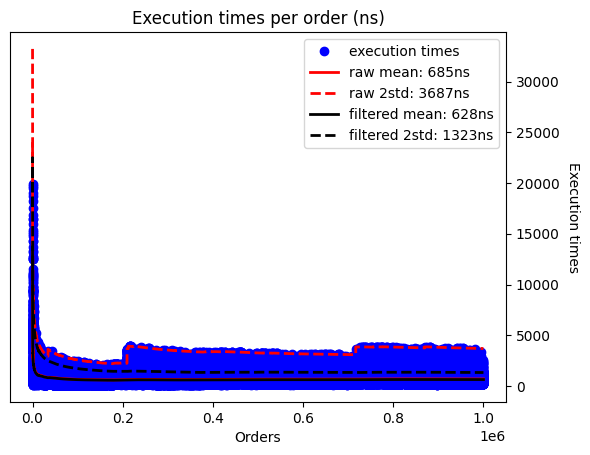

In [110]:
df = data.copy()
fig, ax = plt.subplots()
plt.xlabel(f'Orders')
plt.ylabel(f'Execution times', rotation=270, labelpad=15)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.title(f'Execution times per order (ns)')
std = 2
mean = df['execution_time'].expanding().mean()
outliner_filter = df['execution_time'].expanding().mean() + df['execution_time'].expanding().std()*std
filtered = df[df["execution_time"] < outliner_filter]["execution_time"]
mean_filtered = filtered.expanding().mean()
outliner_filter_filtered = filtered.expanding().mean() + filtered.expanding().std()*std
ax.plot(df[df["execution_time"] < outliner_filter]["execution_time"], 'o', c='b', label="execution times")
ax.plot(mean, 'r', linewidth=2, label=f"raw mean: {int(mean.iloc[-1])}ns")
ax.plot(outliner_filter, 'r--', linewidth=2, label=f"raw 2std: {int(outliner_filter.iloc[-1])}ns")
ax.plot(mean_filtered, 'k', linewidth=2, label=f"filtered mean: {int(mean_filtered.iloc[-1])}ns")
ax.plot(outliner_filter_filtered, 'k--', linewidth=2, label=f"filtered 2std: {int(outliner_filter_filtered.iloc[-1])}ns")
ax.legend()
fig.patch.set_facecolor('xkcd:white')
# fig.set_size_inches(20, 10)

# Number of outliers

In [111]:
mean = df['execution_time'].expanding().mean()
outliner_filter = df['execution_time'].expanding().mean() + df['execution_time'].expanding().std()*2
outliers = df[df["execution_time"] > outliner_filter].count().id
print(f"{round(outliers/len(df)*100,2)}%")

0.62%
